In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Data_Lesson1_ab_Startups.csv')
data = pd.read_csv('Data_Lesson1_c_salaries.csv')

df.info()

x = df[['Adm','RnD',"Marketing"]]
y = df.Profit

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# => gọi mô hình từ thư viện gán vào mô hình bằng một biến

model.fit(x,y)

print('a = ', model.coef_)
print('b = ', model.intercept_)

y_predict = model.predict(x)
y_predict

from sklearn.metrics import r2_score

ac = r2_score(df.Profit,y_predict)
print('The accuracy of this model is:R-square=',"{:.2f}".format(ac))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   No.        44 non-null     int64
 1   Profit     44 non-null     int64
 2   RnD        44 non-null     int64
 3   Adm        44 non-null     int64
 4   Marketing  44 non-null     int64
dtypes: int64(5)
memory usage: 1.8 KB
a =  [-0.04792094  0.76568728  0.02582812]
b =  57.19323971874572
The accuracy of this model is:R-square= 0.96


In [21]:
# Bài tập: Thực hành xây dựng mô hình tính lợi nhuận (y) dựa trên 2 loại chi phí (từng đôi 1)

x1 = df[['Adm','RnD']]
y1 = df.Profit

model_1 = LinearRegression()

model_1.fit(x1,y1)

print('a1 = ', model_1.coef_)
print('b1 = ', model_1.intercept_)

y_predict_1 = model_1.predict(x1)
y_predict_1

ac1 = r2_score(df.Profit, y_predict_1)
print('The accuracy of this model is R-quare = ','{:.2f}'.format(ac1))


a1 =  [-0.07663111  0.81847778]
b1 =  62.281742570771314
The accuracy of this model is R-quare =  0.95


In [22]:
x2 = df[['Adm','Marketing']]
y2 = df.Profit

model_2 = LinearRegression()

model_2.fit(x2,y2)

print('a1 = ', model_2.coef_)
print('b1 = ', model_2.intercept_)

y_predict_2 = model_2.predict(x2)
y_predict_2

ac2 = r2_score(df.Profit, y_predict_2)
print('The accuracy of this model is R-quare = ','{:.2f}'.format(ac2))

a1 =  [0.30797006 0.22591404]
b1 =  31.166547718365777
The accuracy of this model is R-quare =  0.58


In [23]:
x3 = df[['RnD','Marketing']]
y3 = df.Profit

model_3 = LinearRegression()

model_3.fit(x3,y3)

print('a1 = ', model_3.coef_)
print('b1 = ', model_3.intercept_)

y_predict_3 = model_3.predict(x3)
y_predict_3

ac3 = r2_score(df.Profit, y_predict_3)
print('The accuracy of this model is R-quare = ','{:.2f}'.format(ac3))

a1 =  [0.74649945 0.03169497]
b1 =  51.58183627102092
The accuracy of this model is R-quare =  0.96


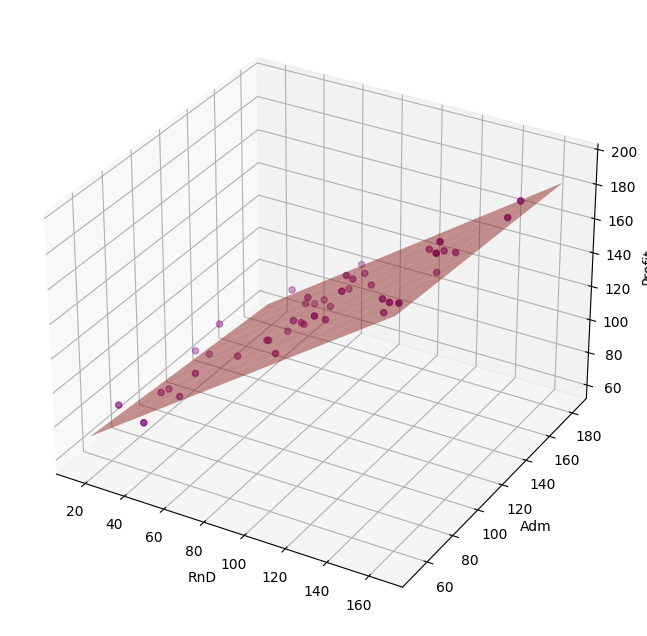

In [24]:
# Hiển thị 3D cho LR 02 variables

from mpl_toolkits.mplot3d import Axes3D

#DATA

x4 = df[['RnD','Adm']].values
y4 = df.Profit

model_4 = LinearRegression()
model_4.fit(x4,y4)

#Tạo lưới 2D bằng cách tạo các điểm trên hai biến R&D và Adm để vẽ mặt phẳng hồi quy. Lưới này được tạo bằng meshgrid và sử dụng các giá trị từ dữ liệu thấp nhất đến cao nhất trên hai biến.
x5, x6 = np.meshgrid(np.linspace(np.min(x4[:, 0]), np.max(x4[:, 0]), 10),
                     np.linspace(np.min(x4[:, 1]), np.max(x4[:, 1]), 10))
#Dự đoán giá trị biến phụ thuộc Profit tương ứng với từng điểm trên lưới. Kết quả được lưu vào biến y4_plane và sau đó được biến đổi thành một mảng 2D với cùng kích thước như lưới x5.
y4_plane = model_4.predict(np.array([x5.ravel(), x6.ravel()]).T).reshape(x5.shape)

#Tạo biểu đồ 3D
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x4[:, 0], x4[:, 1], y4, color = 'purple', label = 'Data Points')

#Vẽ mặt phẳng hồi quy (biểu đồ bề mặt) trên biểu đồ 3D
ax.plot_surface(x5, x6, y4_plane, alpha = 0.5, color = 'brown', label = 'Regression Plane')

ax.set_xlabel('RnD')
ax.set_ylabel('Adm')
ax.set_zlabel('Profit')

plt.show()

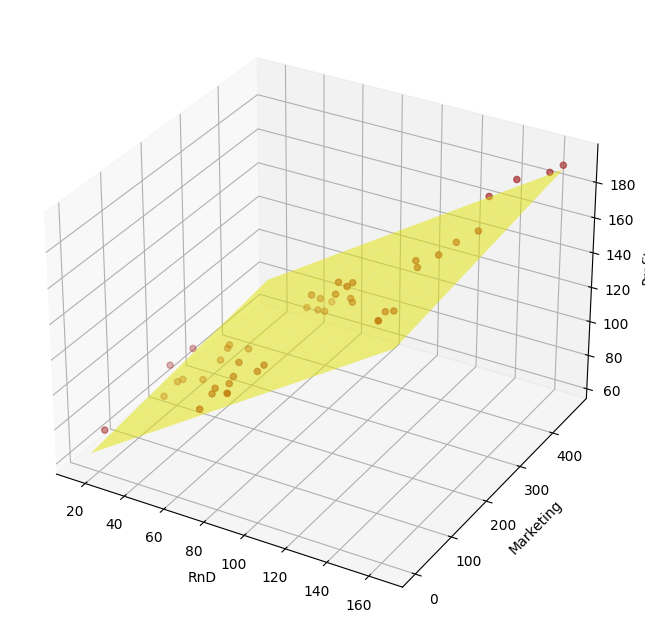

In [25]:
x = df[['RnD','Marketing']].values
y = df.Profit

model = LinearRegression()
model.fit(x,y)

x1, x2 = np.meshgrid(np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 10),
                     np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 10))

y_plane = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(x[:, 0], x[:, 1], y, color = 'brown', label = 'Data Points')
ax.plot_surface(x1, x2, y_plane, alpha = 0.5, color ='yellow', label = 'Regression Plane')

ax.set_xlabel('RnD')
ax.set_ylabel('Marketing')
ax.set_zlabel('Profit')

plt.show()



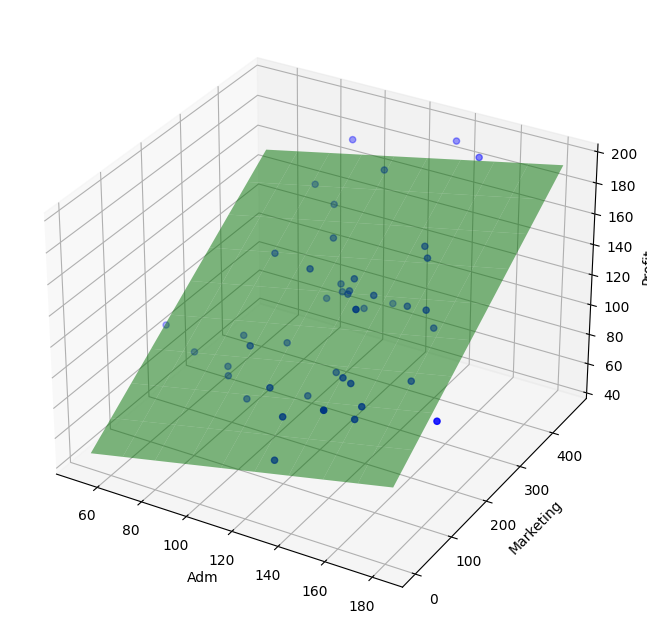

In [26]:
x = df[['Adm','Marketing']].values
y = df.Profit

model = LinearRegression()
model.fit(x,y)

x1, x2 = np.meshgrid(np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 10),
                     np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 10))

y_plane = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:, 1], y, color ='blue', label = 'Data Points')
ax.plot_surface(x1, x2, y_plane, alpha = 0.5, color = 'green', label = 'Regression Plane')

ax.set_xlabel('Adm')
ax.set_ylabel('Marketing')
ax.set_zlabel('Profit')

plt.show()


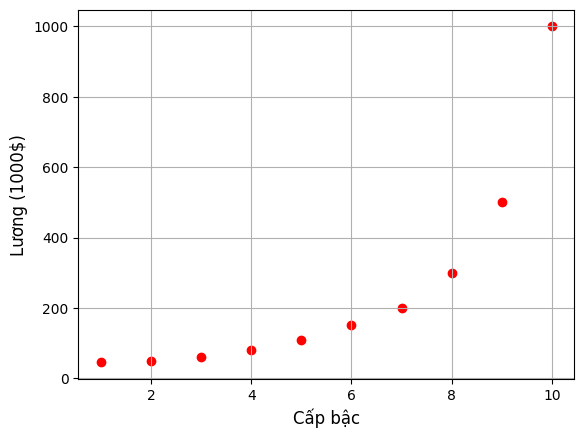

In [27]:
x = data.iloc[:, 1:2].values # biến x là giá trị của cột 2
y = data.iloc[:, 2].values # biến y là giá trị của cột 3

#mô hình thể hiện hai biến x và y

plt.scatter(x, y/1000, color = 'red', marker = 'o')
plt.xlabel('Cấp bậc', fontsize = 12)
plt.ylabel('Lương (1000$)', fontsize = 12)

plt.grid()

In [29]:
# xây dựng mô hình linear

model = LinearRegression()
fit = model.fit(x,y)
y_predict = model.predict(x)
y_predict

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

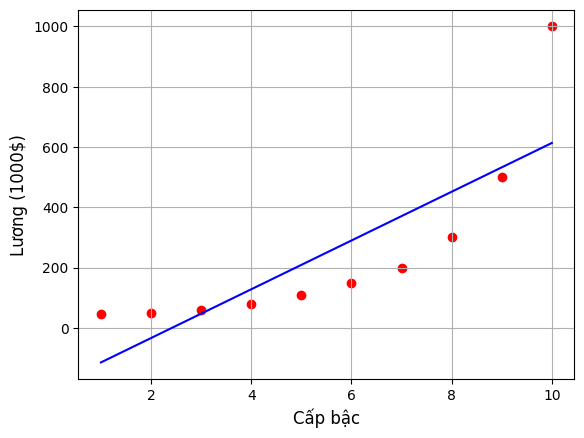

In [31]:
# vẽ hình thể hiện hai biến x và y
plt.xlabel('Cấp bậc', fontsize = 12)
plt.ylabel('Lương (1000$)', fontsize = 12)

plt.scatter(x, y/1000, color ='red', marker = 'o')
plt.plot(x, y_predict/1000, color = 'blue')

plt.grid()

In [35]:
# hình vễ cho thấy mô hình linear không tốt
ac = r2_score(y, y_predict)
print('R-square is: ','{:.2f}'.format(ac))

R-square is:  0.67


In [36]:
# xây dựng mô hình polynomial
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4) # tạo polynomial features bậc 4 ( bậc có thể thay đổi tùy vào dữ liệu)
x_poly = poly_reg.fit_transform(x) # tạo giá trị của x theo polynomial features

In [ ]:
# y = a0x0 + a1x1 + a2x2 + a3x3 + a4x4 + a5x5 + b - Multi-Linear Regressionn
# y = a0x^0 + a1x^1 + a2x^2 + a3x^3 + a4x^4 + a5x^5 + b - Polynomial Regresson

In [38]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)

LinearRegression()

In [41]:
y_predict_poly = model_poly.predict(x_poly)
y_predict_poly

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

In [43]:
model_poly.coef_

array([      0.        , -211002.33100292,   94765.44289063,
        -15463.28671331,     890.15151515])

In [44]:
model_poly.intercept_

184166.66666719783

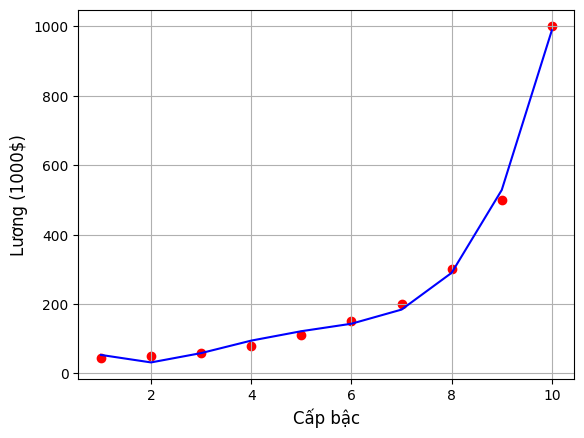

In [45]:
plt.xlabel('Cấp bậc', fontsize = 12)
plt.ylabel('Lương (1000$)', fontsize = 12)

plt.scatter(x, y/1000, color = 'red', marker = 'o')
plt.plot(x, y_predict_poly/1000, color = 'blue')

plt.grid()

In [47]:
# tính lại độ chính xác r^2

ac = r2_score(y, y_predict_poly)
print('R-square is : ','{:.2f}'.format(ac))

R-square is :  1.00


In [48]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [49]:
from sklearn.metrics import mean_absolute_error
import math

mea = mean_absolute_error(y, y_predict_poly)
mea

12681.818181828514

In [50]:
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y, y_predict_poly))
rmse

14503.234909626777